<a href="https://colab.research.google.com/github/D47kAnnon/telehealth/blob/main/Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data and Libraries

In [ ]:
from google.colab import auth
import pandas as pd
import numpy as np
import gspread
from google.auth import default
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
plt.style.use('seaborn-white')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [ ]:
auth.authenticate_user()
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('1cMKX529yV7o_Z7ABzI648DAJE6-ZkZq5QKdAUZgROYQ')
sheet = 'Sheet1'
rows = wb.worksheet(sheet).get_all_values()
data = pd.DataFrame.from_records(rows[1:], columns=rows[0])
df = data.copy(deep=True)
df = df.replace('-', np.nan)

## Change corresponding datatypes

In [ ]:
categorical_cols = ['gender', 'address_country', 'address_sr', 
                    'address_tsp', 'diagnosis', 'follow_up', 'consultation_type', 'change_consultation_type', 
                    'doctor_name', 'duty_time']
float_col = ['age']
num_cols = ['Q_and_A', 'no_show']
date_cols = ['duty_date', 'created_time']

df[categorical_cols] = df[categorical_cols].astype('category')
df[num_cols] = df[num_cols].astype('int')
df[float_col] = df[float_col].astype('float')

for date_col in date_cols: 
  df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)

In [ ]:
df.dtypes

visitID                             object
patientID                           object
gender                            category
address_country                   category
address_sr                        category
address_tsp                       category
age                                float64
diagnosis                         category
follow_up                         category
clinical_note                       object
treatment                           object
consultation_time                   object
consultation_type                 category
change_consultation_type          category
doctor_name                       category
duty_date                   datetime64[ns]
duty_time                         category
created_time                datetime64[ns]
Q_and_A                              int64
no_show                              int64
dtype: object

## Daily Number of Visits

In [ ]:
df['duty_date_month'] = df['duty_date'].dt.month_name()
df_select = df[df['duty_date']!=min(df['duty_date'])]
daily_counts = df_select.groupby('duty_date').count()['gender']

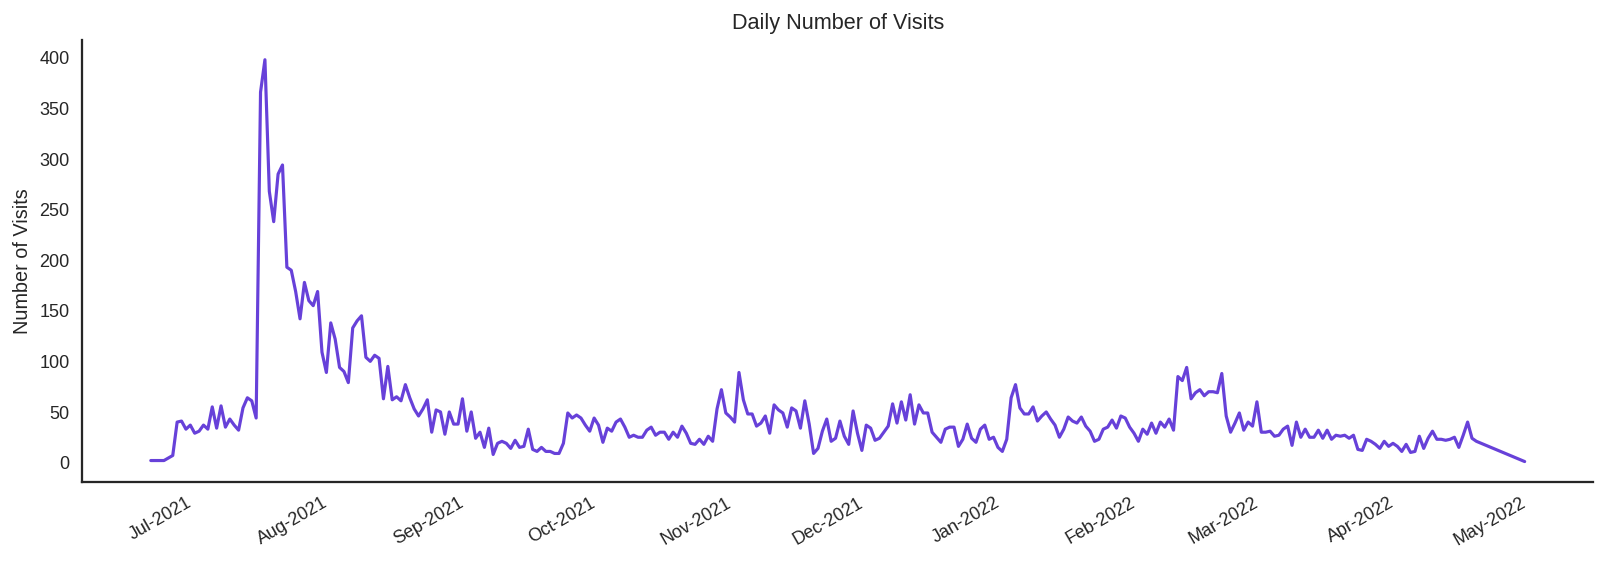

In [ ]:
plt.figure(figsize=(15, 5), dpi=130)
ax = daily_counts.plot(color='#6741d9', title='Daily Number of Visits');
plt.xlabel('');
plt.ylabel('Number of Visits');

# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b-%Y')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

## Total Patients for Each Months

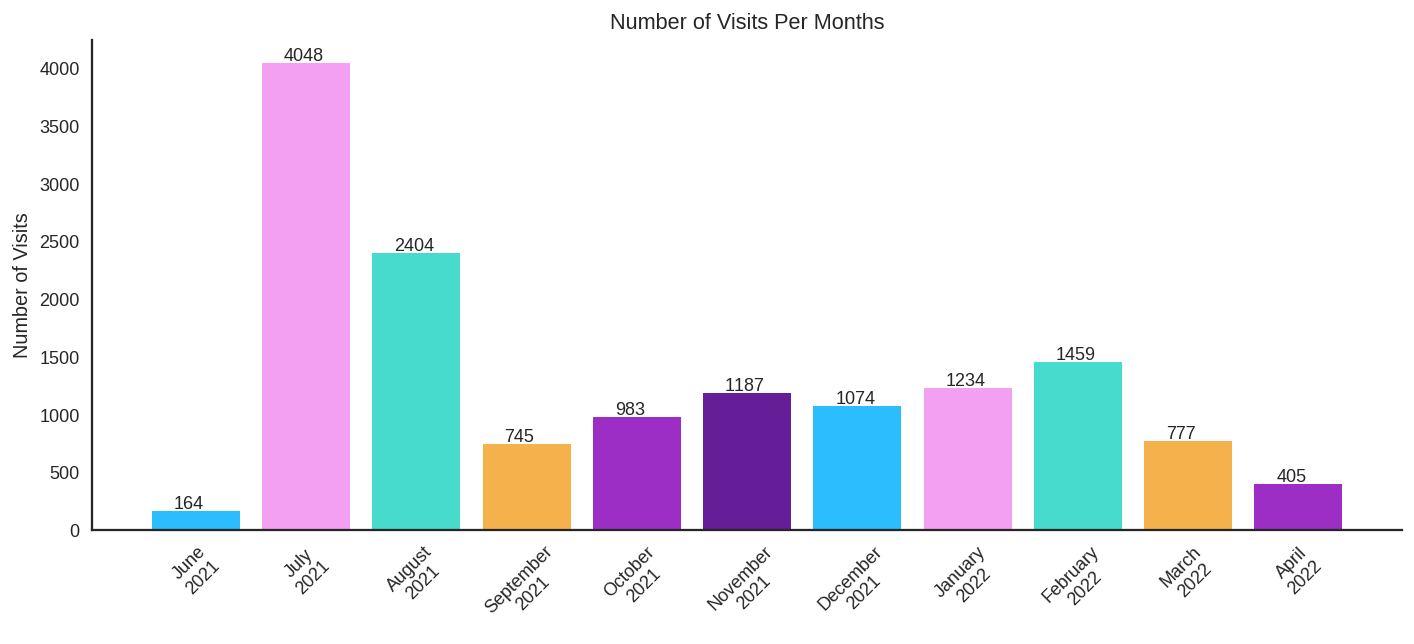

In [ ]:
months_resample = daily_counts.resample('M').sum()

x_yr = months_resample.index.year
x_mth = months_resample.index.month_name()
x_lab = [f'{m}\n{yr}' for m, yr in zip(x_mth, x_yr)]

plt.figure(figsize=(13, 5), dpi=130)
plt.bar(x_lab, months_resample.values, color=color_list)
plt.xlabel('')
plt.ylabel('Number of Visits')
plt.title('Number of Visits Per Months');
plt.xticks(rotation=45);

xlocs, xlabs = plt.xticks()
for i, v in enumerate(months_resample.values):
    plt.text(xlocs[i]-0.2, v + 20, str(v))

## Number visits in different time slots of the day

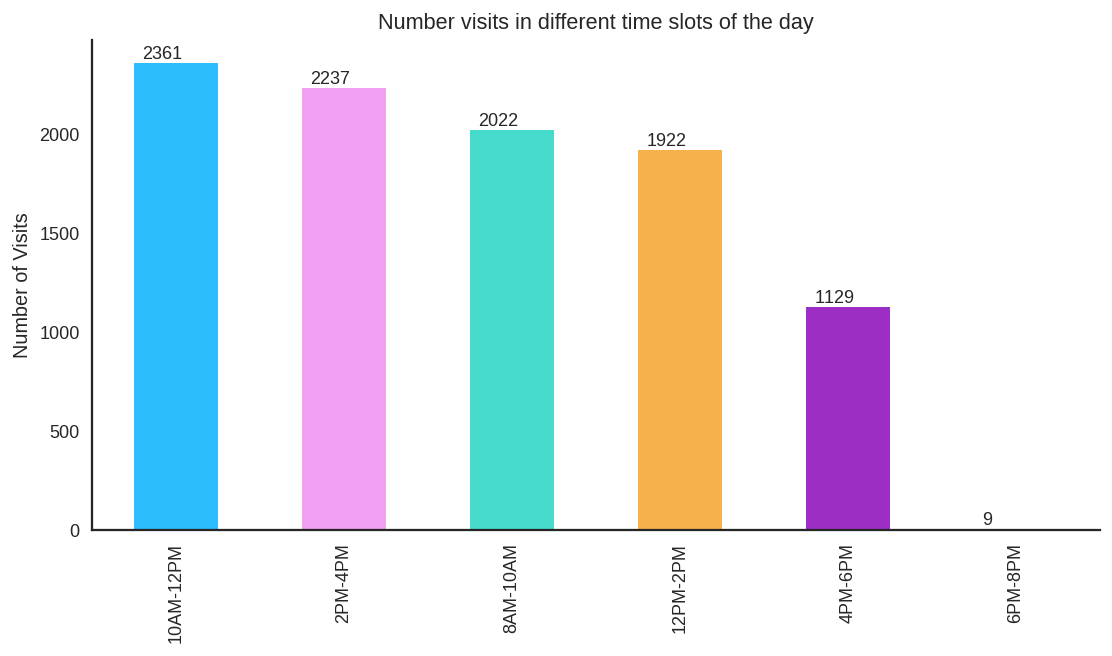

In [ ]:
plt.figure(figsize=(10,5), dpi=130)
duty_time = df['duty_time'].value_counts()
duty_time.plot(kind='bar', color=color_list)
plt.ylabel('Number of Visits')
plt.title('Number visits in different time slots of the day')
xlocs, xlabs = plt.xticks()
for i, v in enumerate(duty_time.values):
    plt.text(xlocs[i]-0.2, v + 20, str(v))

## From which part of the world are our patients coming from?

In [ ]:
pd.DataFrame(df['address_country'].value_counts())

,address_country
Myanmar,22443
Thailand,10
Malaysia,2
United Arab Emirates (UAE),2
Singapore,1


## How many percent of patients have come back for a 2nd visit, 3rd visit?

In [ ]:
num_visits_per_pt = df['patientID'].value_counts()
visit_more_than_one = num_visits_per_pt[num_visits_per_pt > 1]

In [ ]:
pd.DataFrame({'Number_of_visits':visit_more_than_one.value_counts().index,
              'Number_of_patients':visit_more_than_one.value_counts().values,
             'Percent_of_patients':visit_more_than_one.value_counts().values/len(num_visits_per_pt)})

,Number_of_visits,Number_of_patients,Percent_of_patients
0,2,2049,0.125937
1,3,542,0.033313
2,4,277,0.017025
3,5,119,0.007314
4,6,76,0.004671
5,8,42,0.002581
6,7,36,0.002213
7,10,21,0.001291
8,9,12,0.000738
9,11,9,0.000553


## Number of consultation type

In [ ]:
df['consultation_type'].value_counts()

Voice Call Consultation                                              4219
Text Consultation                                                    1403
Video Call Consultation                                               546
Voice Call Consultation,Text Consultation                              17
Text Consultation,Voice Call Consultation                               2
Video Call Consultation,Voice Call Consultation,Text Consultation       2
Video Call Consultation,Text Consultation                               1
Voice Call Consultation,Video Call Consultation,Text Consultation       1
Name: consultation_type, dtype: int64

In [ ]:
df['consultation_time'].unique()

array([nan, '900', '0', '240', '180', '10', '1440', '660', '360', '13',
       '420', '120', '480', '15', '9', '1200', '7', '600', '1140', '12',
       '300', '14', '540', '16', '70', '2', '5', '780', '25', '1', '8',
       '30', '18', '720', '3120', '1080', '840', '1740', '733', '1320',
       '1260', '1500', '1800', '1020', '960', '3600', '610', '2700',
       '710', '1220', '11', '24', '2100', '470', '1560', '698', '20',
       '860', '1620', '6', '3000', '3050', '615', '1042', '671', '4', '3',
       '19', '26', '5400', '2580', '1680', '672', '732', '60', '2400',
       '1095', '697', '1115', '842', '1830', '1520', '647', '850', '17',
       '620', '1090', '1110', '1094', '1515', '650', '1769', '305',
       '2685', '855', '450', '492', '972', '21', '1101', '391', '956',
       '740', '356', '520', '1202', '915', '730', '516', '638', '372',
       '1465', '599', '695', '790', '572', '330', '763', '856', '1028',
       '507', '917', '2220', '541', '375', '689', '526', '765', '316',
